In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import seaborn as sns

In [ ]:
df0 = pd.DataFrame()
# Lista de URLs dos sites de e-commerce (exemplo genérico)
urls_base = [
    'https://lista.mercadolivre.com.br/'
]

produto_na_busca = 'ar condicionado'
potencia = ['12000', '18000', '22000'] # lista de detalhes
#detalhe = input('digite detalhe: ') #use imput se quiser digitar a busca e lista de detalhes

for i in potencia:

  # Lista para armazenar os dados
  dados = []

  # Para cada URL na lista de URLs
  for url in urls_base:
      # Realiza uma requisição GET para a URL
      resposta = requests.get(url + produto_na_busca + i)

      # Se a requisição for bem-sucedida
      if resposta.status_code == 200:
          # Cria um objeto BeautifulSoup para analisar o HTML
          site = BeautifulSoup(resposta.text, 'html.parser')

          # Encontra os elementos que contêm os dados de interesse (este seletor é genérico e deve ser adaptado)
          produtos = site.find_all('li', attrs={'class': 'ui-search-layout__item shops__layout-item ui-search-layout__stack'})
          #marca1 = produtos.find('h2', attrs={'class': 'ui-search-item__title'})


          # Para cada produto encontrado
          for produto in produtos:
              #print(f'o prod é: {produto}')
              # Extrai os dados de interesse (marca, btu, modelo, preço)
              # Nota: Os seletores específicos e métodos de extração de texto devem ser adaptados
              marca = produto.find('h2', attrs={'class': 'ui-search-item__title'}).text
              #btu = produto.find('span', class_='btu').text
              #modelo = produto.find('span', class_='modelo').text
              valor = produto.find('span', attrs={'class': 'andes-money-amount ui-search-price__part ui-search-price__part--medium andes-money-amount--cents-superscript'})
              valor = valor.text.replace('R$', '')
              link = produto.find('a', attrs={'class': 'ui-search-item__group__element ui-search-link__title-card ui-search-link'})

              # Adiciona os dados extraídos à lista de dados
              dados.append([url, marca, i, valor, link['href']])

  # Cria um DataFrame do Pandas com os dados coletados
  df = pd.DataFrame(dados, columns=['url' ,'marca', 'detalhe', 'valor', 'link'])

  df['valor'] = df['valor'].str.replace('.','')
  df['valor'] = df['valor'].str.replace(',','')
  df['valor'] = df['valor'].astype('float')

  df.to_excel(f'/content/drive/MyDrive/Busca na internet/ Mercado_livre_-{produto_na_busca}_{i}.xlsx')

  df0 = pd.concat([df0, df], axis=0)

In [ ]:
produtos[0].prettify()

'<li class="ui-search-layout__item shops__layout-item ui-search-layout__stack">\n <div class="ui-search-result__wrapper">\n  <div class="andes-card ui-search-result ui-search-result--core andes-card--flat andes-card--padding-16" id=":Rakloq:">\n   <div class="ui-search-result__image">\n    <section aria-label="Ar Condicionado LG Voice Dual Inverter Ia 9000 Btus Só Frio 220v Branco" aria-roledescription="Carrossel" class="andes-carousel-snapped__container andes-carousel-snapped__container--full andes-carousel-snapped__container--with-controls" id=":Ragakloq:">\n     <div class="andes-carousel-snapped__header">\n     </div>\n     <div class="andes-carousel-snapped__controls-wrapper">\n      <button aria-label="Anterior" class="andes-carousel-snapped__control andes-carousel-snapped__control--previous andes-carousel-snapped__control--size-large andes-carousel-snapped__control--disabled" disabled="" type="button">\n       <span aria-hidden="true" class="andes-carousel-snapped__control__icon

In [ ]:
df0.reset_index(inplace=True, drop=True)

In [ ]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   url      152 non-null    object 
 1   marca    152 non-null    object 
 2   detalhe  152 non-null    object 
 3   valor    152 non-null    float64
 4   link     152 non-null    object 
dtypes: float64(1), object(4)
memory usage: 6.1+ KB


In [ ]:
r=2

print(df['link'][r] + '\n')
print(df['marca'][r] + '\n')
print(f"{df['valor'][r]} \n")

https://www.mercadolivre.com.br/ar-condicionado-split-inverter-samsung-windfree-22000-btu-cor-branco-220v/p/MLB23918678?pdp_filters=category:MLB1646#searchVariation=MLB23918678&position=3&search_layout=stack&type=product&tracking_id=b8f8c221-4c18-4607-b8fd-8832c176fa31

Ar Condicionado Split Inverter Samsung Windfree 22.000 Btu Cor Branco 220V

6047.0 



In [ ]:
df0.to_excel(f'/content/drive/MyDrive/Busca na internet/ Mercado_livre_-{produto_na_busca}.xlsx')

In [ ]:
substrings = ['9000', 'Hisense']

# Combinando as substrings em uma única expressão regular com o operador '|'
regex_pattern = '|'.join(substrings)

# Verificando se alguma das substrings está presente na coluna 'nome'
mask = df0['marca'].str.contains(regex_pattern, regex=True)

In [ ]:
df0_clean = df0[~mask]

In [ ]:
df0_clean

,url,marca,detalhe,valor,link
0,https://lista.mercadolivre.com.br/,Ar Condicionado LG Voice Dual Inverter IA 1200...,12000,2699.0,https://www.mercadolivre.com.br/ar-condicionad...
1,https://lista.mercadolivre.com.br/,Ar Cond Inverter Midea Airvolution Connect 120...,12000,2419.0,https://www.mercadolivre.com.br/ar-cond-invert...
3,https://lista.mercadolivre.com.br/,Ar condicionado Samsung Windfree Connect spli...,12000,3599.0,https://www.mercadolivre.com.br/ar-condicionad...
5,https://lista.mercadolivre.com.br/,Ar Condicionado Inverter Windfree Sem Vento Co...,12000,3070.0,https://www.mercadolivre.com.br/ar-condicionad...
6,https://lista.mercadolivre.com.br/,Ar condicionado Gree split frio 12000 BTU b...,12000,2377.0,https://www.mercadolivre.com.br/ar-condicionad...
...,...,...,...,...,...
147,https://lista.mercadolivre.com.br/,Ar Condicionado Split Hi Wall Agratto 22.000 B...,22000,7974.0,https://produto.mercadolivre.com.br/MLB-363243...
148,https://lista.mercadolivre.com.br/,Ar Condicionado Split Samsung Inverter 22000 B...,22000,5449.0,https://produto.mercadolivre.com.br/MLB-171628...
149,https://lista.mercadolivre.com.br/,Ar Condicionado Split Inverter Samsung Windfre...,22000,11084.0,https://produto.mercadolivre.com.br/MLB-363262...
150,https://lista.mercadolivre.com.br/,Ar Condicionado Split Consul 22.000 Btus Maxi ...,22000,8569.0,https://produto.mercadolivre.com.br/MLB-363123...


In [ ]:
df0_clean.groupby(['detalhe'])['valor'].agg(['min', 'max', 'mean', 'median', 'std']).round(1)

,min,max,mean,median,std
detalhe,,,,,
12000,2049.0,5639.0,3121.7,2962.5,682.9
18000,2699.0,11196.0,4775.2,4199.0,1913.8
22000,2899.0,79920.0,8942.8,5449.0,15042.9


<Axes: ylabel='valor'>

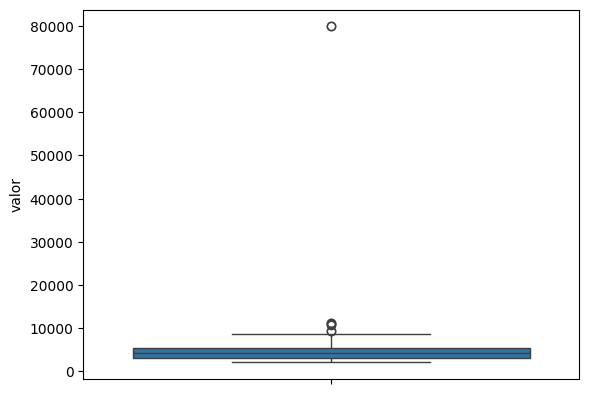

In [ ]:
sns.boxplot(df0_clean['valor'])

<Axes: xlabel='valor', ylabel='Count'>

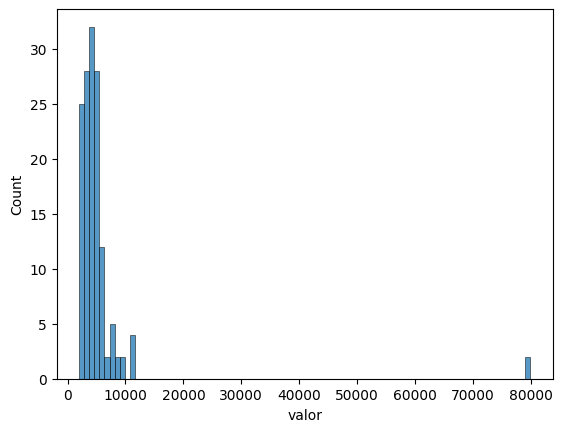

In [ ]:
sns.histplot(df0_clean['valor'])

In [ ]:
max=3000
min=2000
df0_selected = df0_clean.loc[(df0_clean['valor'] >= min) & (df0_clean['valor'] <= max)]

In [ ]:
df0_selected.groupby(['detalhe'])['valor'].agg(['min', 'max', 'mean', 'median', 'std']).round(1)

,min,max,mean,median,std
detalhe,,,,,
12000,2049.0,2964.0,2630.0,2699.0,241.3
18000,2699.0,2976.0,2837.5,2837.5,195.9
22000,2899.0,3000.0,2949.5,2949.5,71.4


In [ ]:
df0_selected[df0_selected['valor'] == 3000]

,url,marca,detalhe,valor,link
131,https://lista.mercadolivre.com.br/,Ar Condicionado Split Hw Inverter LG Dual Voic...,22000,3000.0,https://produto.mercadolivre.com.br/MLB-364741...


In [ ]:
mask1 = df0_selected['marca'].str.contains('12000', regex=False) | df0_selected['marca'].str.contains('12.000', regex=False) | df0_selected['marca'].str.contains('12kbtu', regex=False)

In [ ]:
df0_selected[~mask1]

,url,marca,detalhe,valor,link
47,https://lista.mercadolivre.com.br/,Elgin Eco 220V,12000,2049.0,https://www.mercadolivre.com.br/elgin-eco-220v...
63,https://lista.mercadolivre.com.br/,Ar Condicionado Split Inverter 18000 Btus Frio...,18000,2976.0,https://produto.mercadolivre.com.br/MLB-403034...
131,https://lista.mercadolivre.com.br/,Ar Condicionado Split Hw Inverter LG Dual Voic...,22000,3000.0,https://produto.mercadolivre.com.br/MLB-364741...
132,https://lista.mercadolivre.com.br/,Ar Condicionado Split Gree 22.000,22000,2899.0,https://produto.mercadolivre.com.br/MLB-458176...


In [ ]:
r=63

print(df0_selected['link'][r] + '\n')
print(df0_selected['marca'][r] + '\n')
print(f"{df0_selected['valor'][r]} \n")

https://produto.mercadolivre.com.br/MLB-4030340424-ar-condicionado-split-inverter-18000-btus-frio-eos-220v-_JM#position=37&search_layout=stack&type=item&tracking_id=773b59d4-55f5-4183-8ccb-407f0484b54d

Ar Condicionado Split Inverter 18000 Btus Frio Eos 220v

2976.0 



In [ ]:
max=3000
min=2000
btu = '12000'
df0_btu = df0[df0['detalhe'] == btu]
df0_btu = df0_btu.loc[(df0_btu['valor'] >= min) & (df0_btu['valor'] <= max)]

In [ ]:
df0_btu

https://produto.mercadolivre.com.br/MLB-3651552823-ar-cond-split-hw-inverter-lg-dual-voice-22000-btus-frio-220v-_JM#position=29&search_layout=stack&type=item&tracking_id=966d4a36-14d3-4796-a1ef-a96469138640
